In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
    

--2020-12-18 13:01:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2020-12-18 13:01:04 (229 KB/s) - ‘loan_train.csv’ saved [23101/23101]



## IMPORTING ALL THE NECESSARY PKGs AND DATASET 'loan_csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
df=pd.read_csv('loan_train.csv')
df.shape

(346, 10)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


## CLEANING THE DATA


In [6]:
df.dropna(axis=0,how='any')
df.drop_duplicates()
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## DATA VISUALIZATION

In [7]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
ma=df.Principal.max()
mi=df.Principal.min()
print(ma,mi)
n=np.linspace(mi,ma,5)

1000 300


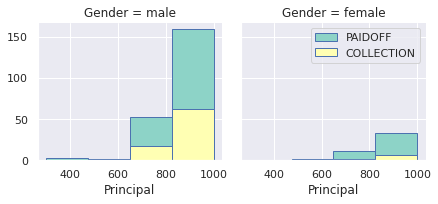

In [77]:
n=np.linspace(mi,ma,5)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=3)
sns.set(style='darkgrid')
g.map(plt.hist, 'Principal', bins=n ,ec='b')


g.axes[-1].legend()
plt.show()


In [9]:
#l=list(df['education'].unique())
k=df.education.value_counts()
k=dict(k)    
k

{'High School or Below': 151,
 'college': 149,
 'Bechalor': 44,
 'Master or Above': 2}

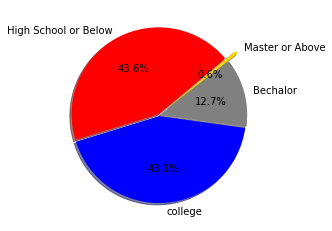

In [10]:

labels=list(k.keys())
sizes=list(k.values())
colors=['red','blue','grey','gold']

plt.pie(sizes,explode=[0.01,0.012,0.015,0.15], labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=40)

#plt.legend(labels, loc="lower left")
plt.show()


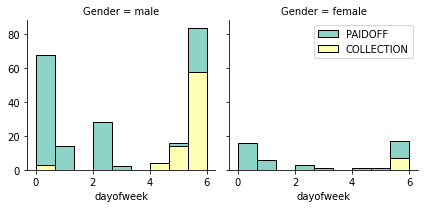

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## NORMALIZATION

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [25]:

df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [27]:

Features = df[['Principal','terms','age','Gender']]
Features = pd.concat([Features,pd.get_dummies(df['education'])], axis=1)

Features.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


In [28]:
x=Features

x= preprocessing.StandardScaler().fit(x).transform(x)
y=df['loan_status'].values
x

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

## CLASSIFICATION


### KNN

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [32]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7479338842975206
Test set Accuracy:  0.6346153846153846


In [33]:

from sklearn.neighbors import KNeighborsClassifier


k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7727272727272727
Test set Accuracy:  0.6730769230769231


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61538462, 0.51923077, 0.69230769, 0.63461538, 0.69230769,
       0.67307692, 0.72115385, 0.72115385, 0.70192308])

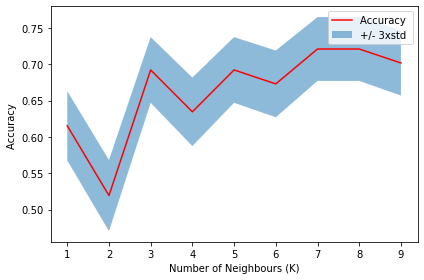

In [36]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.5)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7211538461538461 with k= 7


### DECISION TREE

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
loan_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loan_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
loan_Tree.fit(X_train,y_train)
predTree = loan_Tree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7403846153846154


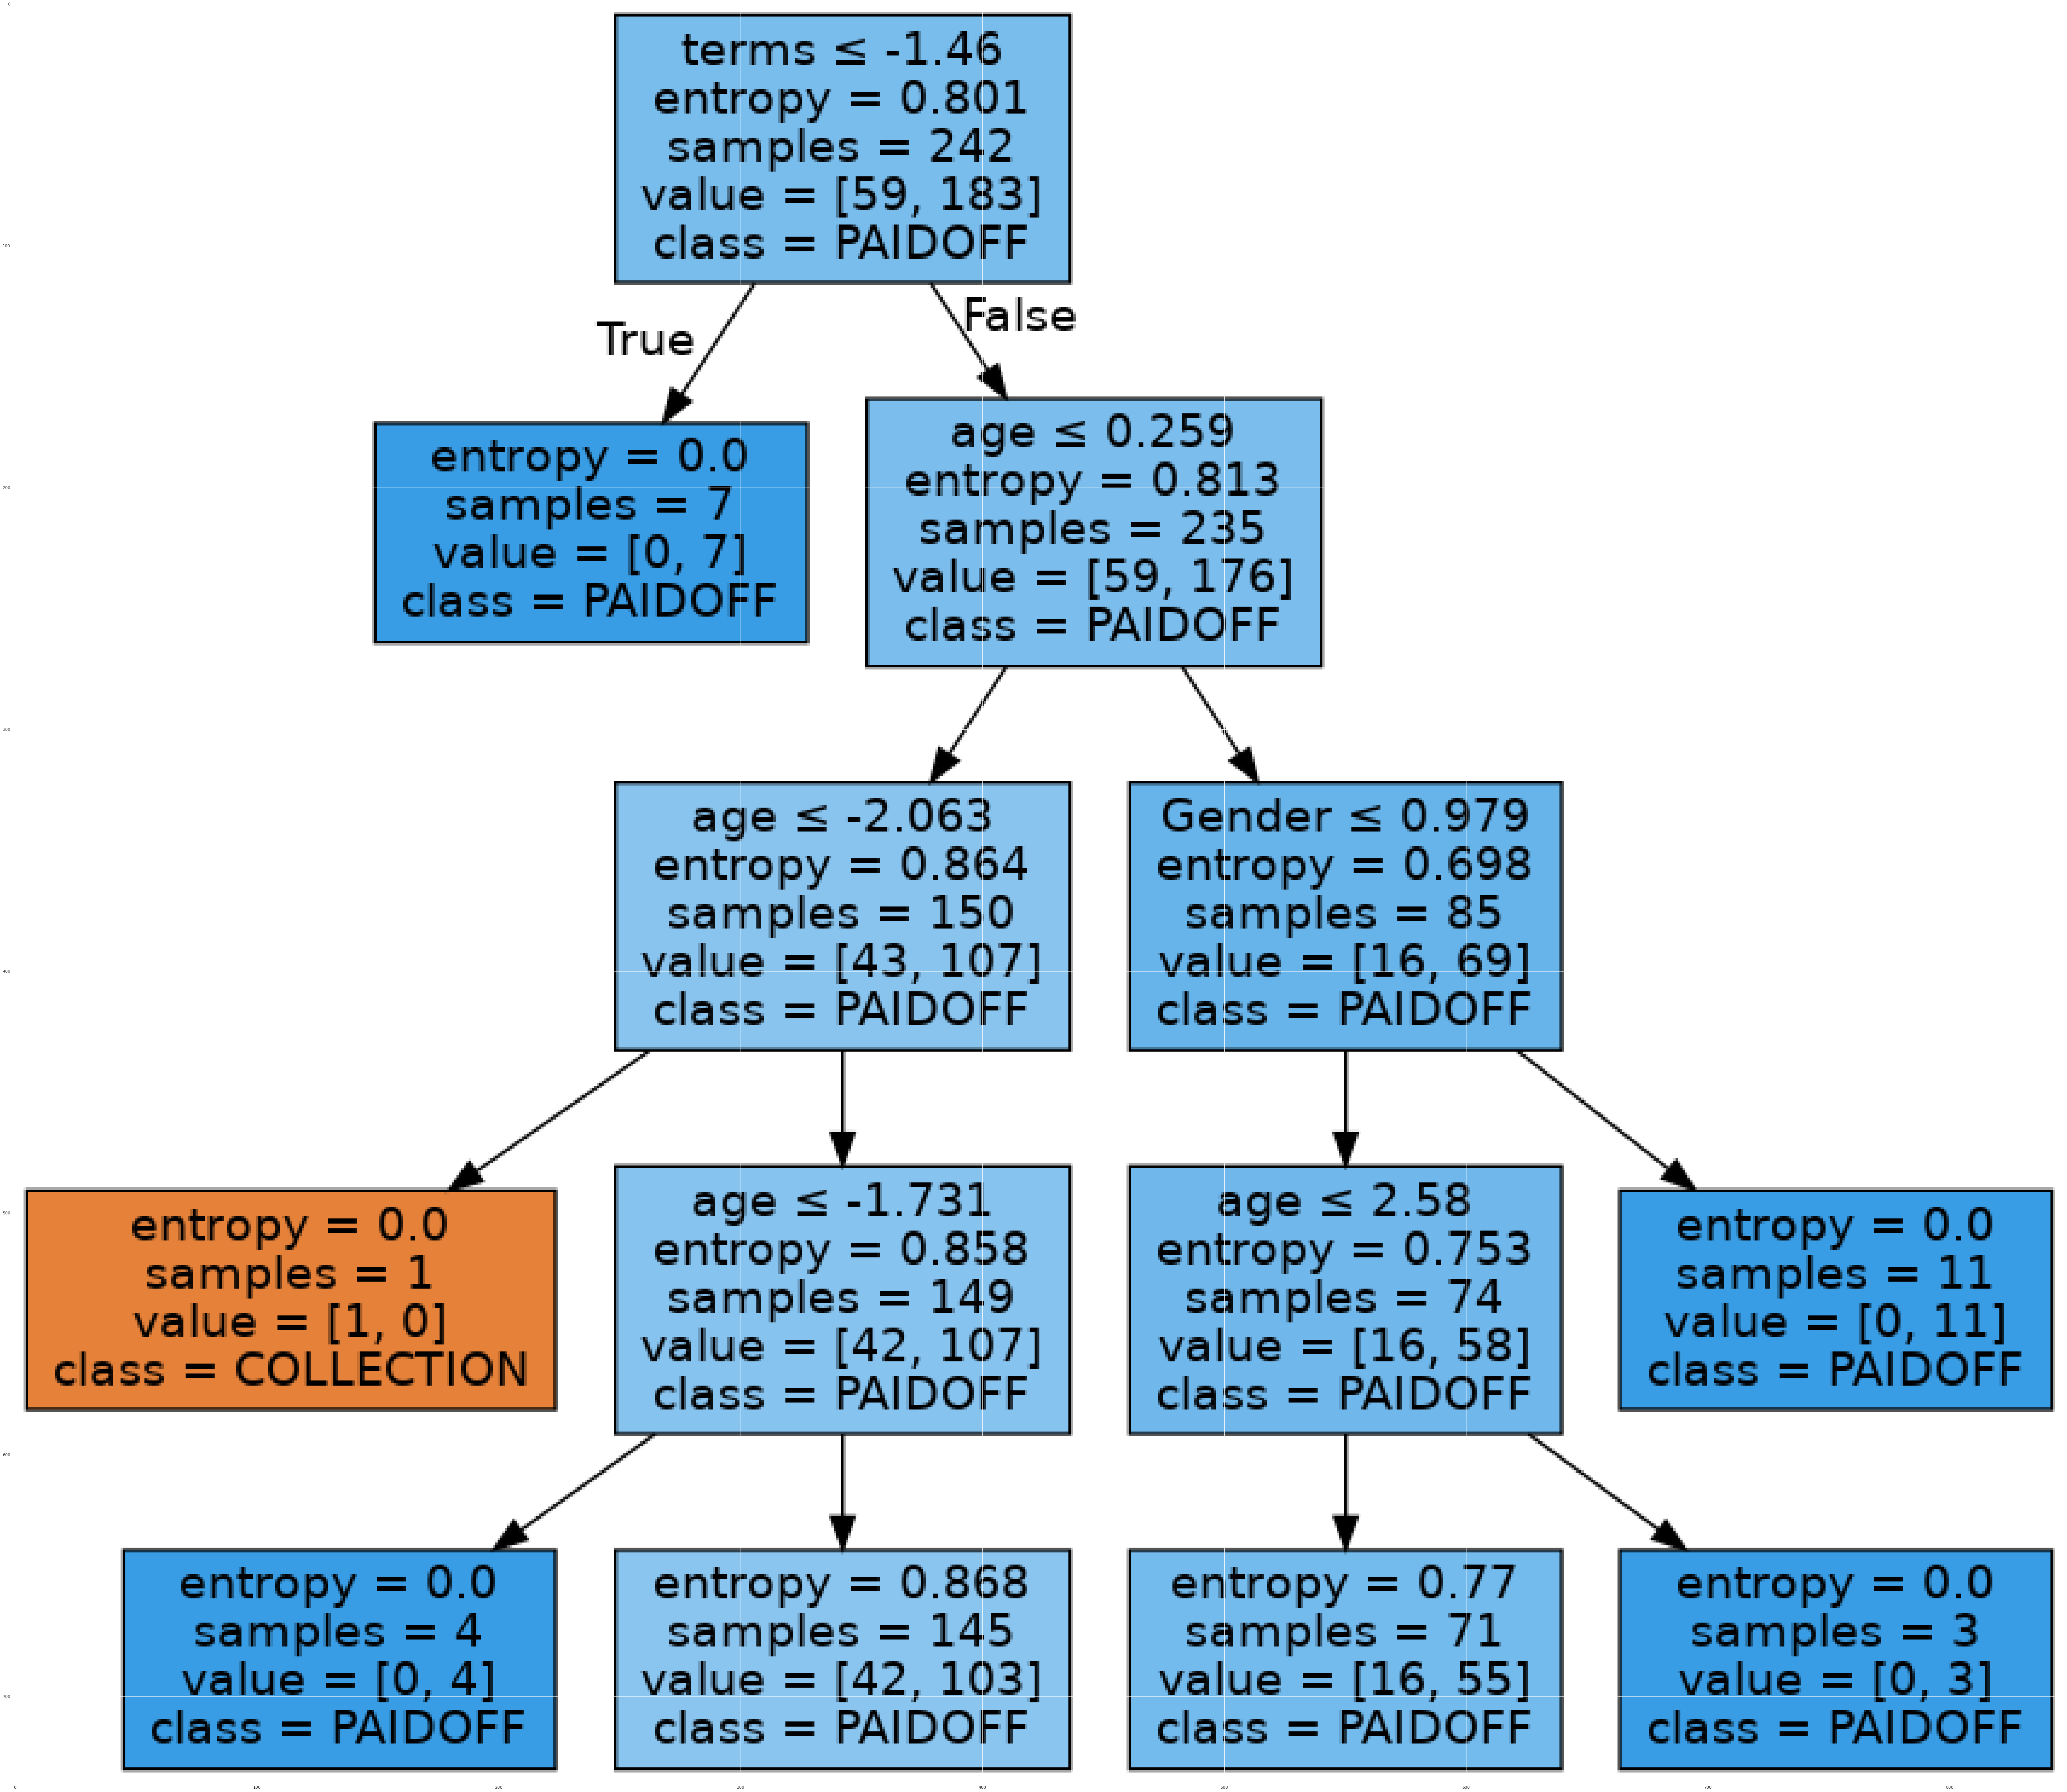

In [146]:

!pip install graphviz
!pip install pydotplus
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
my_data=df
dot_data = StringIO()
filename = "loan_tree.png"
targetNames = my_data["loan_status"].unique().tolist()
out=tree.export_graphviz(loan_Tree,feature_names=Features.columns, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### SVMs

In [41]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

In [42]:
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

In [43]:
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.6299405014874628

### LOGISTIC REGRESSION

In [44]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [45]:

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

#Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label="PAIDOFF")

0.7403846153846154

## EVALUATION

In [46]:

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [50]:

knn_pred=neigh.predict(X_test)
jc1=jaccard_score(y_test, knn_pred,pos_label="PAIDOFF")
fs1=f1_score(y_test, knn_pred, average='weighted')

tree_pred=loan_Tree.predict(X_test)
jc2=jaccard_score(y_test, tree_pred,pos_label="PAIDOFF")
fs2=f1_score(y_test, tree_pred, average='weighted')

svm_pred=clf.predict(X_test)
jc3=jaccard_score(y_test, svm_pred,pos_label="PAIDOFF")
fs3=f1_score(y_test, svm_pred, average='weighted')

log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_score(y_test, log_pred,pos_label="PAIDOFF")
fs4=f1_score(y_test, log_pred, average='weighted')  
ll4=log_loss(y_test, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.701923,0.610713,NA
Decision Tree,0.740385,0.629941,NA
SVM,0.740385,0.629941,NA
Logistic Regression,0.740385,0.629941,0.618256
